# **Objective**

The primary aim of this study is to predict whether or not a patient has diabetes accurately based on the dataset.

![](http://)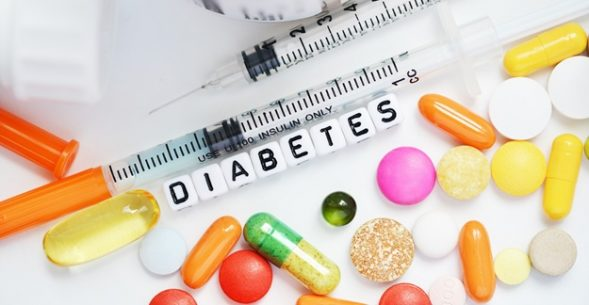
Source:https://medshadow.org/diabetes-medications/

# 1. IMPORT SOME NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from warnings import filterwarnings
filterwarnings('ignore')

**Load Data**

In [ ]:
df1 = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
df = df1.copy()

# 2. UNDERSTANDING THE DATA-SET

**Data Summary**

This dataset  is obtained from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The sample size is 768.  In this dataset , there is one dependent variable (outcome- 0:Non-Diab,1: Diab) and 
eight independent or predictor variables (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI,
DiabetesPedigreeFunction, and Age).

The description of  variables in this data as follows:
* Pregnancies: Number of times pregnant
* Glucose: Glucose 
* BloodPressure: Blood pressure
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: Insulin
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function which scores likelihood of diabetes based on family history.
* Age: Age (years)
* Outcome: Class variable (0 or 1)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.index

In [ ]:
df.describe().T

The pairplot is visualized by using the seaborn library. Each variable has been compared with another variable.

In [ ]:
sns.pairplot(df[['Age','Pregnancies','Insulin','BMI','SkinThickness','Glucose']])
plt.show()

# 3. ANALYSIS of CATEGORICAL VARIABLE

In [ ]:
more_cat_cols = [col for col in df.columns if len(df[col].unique()) < 10]
print('Number of Categorical Variable : ', len(more_cat_cols))
print(more_cat_cols)

Displaying Categorical Variables with Column Graph

In [ ]:
sns.countplot(x="Outcome", data=df)
plt.show()

# 4. ANALYSIS of NUMERICAL VARIABLE

In [ ]:
df.describe().T

In [ ]:
df.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

How many numeric variables are in the data set?

In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O']
print('Number of numerical variables: ', len(num_cols))

What are the names of the numeric variables?

In [ ]:
num_cols

Visualization of numeric variables

In [ ]:
def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")

In [ ]:
hist_for_nums(df, num_cols)

# 5. ANALYSIS of DEPENDENT VARIABLE (TARGET ANALYSIS)

Finding the number of values in the target column

In [ ]:
df["Outcome"].value_counts()

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(df["Outcome"].value_counts(),  labels=['healthy','diabetic'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

As seen from the values above, there is an imbalance between the classes of the dependent variable.
 That is, the number of diabetic is 268 while the number of patients with non-diabetes is 500.

# 6. ANALYSIS of NUMERICAL VARIABLE

**Correlation Matrix**

In [ ]:
df.corr()
a = df.corr()['Outcome'].sort_values(ascending=False)
print(a)

**Correlation of variables with Heatmap**

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin = 0,vmax=1,square=True,cmap="YlGnBu",ax=ax)
plt.show()
""" there is no multicollinearity among the independent variables """

# 6. DATA PREPROCESSING & FEATURE ENGINEERING

**6.1. Missing Values**

Checking  missing value

In [ ]:
df.isnull().values.any()

In [ ]:
df.isnull().sum()

There is no missing value in data set.

When the data set is examined; It was observed that some values of Glucose, BloodPressure, SkinThickness,
Insulin and BMI variables were 0. If such values are 0 in a person, it is against the life cycle. So. 
The glucose ratio, blood pressure, skin thickness, insulin and body mass index of a living person cannot be 0.
Therefore, the value of o in these variables doesnt make sense and and this indicates missing value. 
0 values should be replaced by NaN 
In this context, values should be shown as NaN, meaning empty instead of 0.

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness',
                                                                      'Insulin','BMI']].replace(0,np.NaN)

Here, this code block shows the number of NaN values.

In [ ]:
df.isnull().sum()

Regarding these variables, all 0 values are encoded with NaN value.

Now, there are two solutions for NaN replacing 0 values. The first is to delete them, that is, to remove them 
from the data set. The second is to fill in this blank data. The first way is not used. Because the number of data 
is very low. Therefore, the second way will be used as a solution.

In [ ]:
new_nan_values =["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [ ]:
df["Glucose"].describe().T

In [ ]:
def median_dependent(var):
    temp = df[df[var].notnull()]
    temp = df[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

Glucose: The median for healthy people (107.0), for those with diabetes (140.0)

In [ ]:
median_dependent("Glucose")

In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

Blood Pressure: The median for healthy people (70.0), for those with diabetes (74.5)

In [ ]:
median_dependent("BloodPressure")

In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

Skin Thickness: The median for healthy people (27.0), for those with diabetes (32.0)

In [ ]:
median_dependent("SkinThickness")

In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

Insulin: The median for healthy people (102.5), for those with diabetes (169.5)

In [ ]:
median_dependent("Insulin")

In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

BMI (Body Mass Index): The median for healthy people (30.1), for those with diabetes (34.3)

In [ ]:
median_dependent("BMI")

In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

In [ ]:
df.isnull().sum()

Missing values no longer appear after filling the NaN (blank data) values with the medians of the variables

**6.2. Outlier Treatment**

For outlier treatment, the interquartile range (IQR)  method are used to detect outliers.  This is done in 
following steps:First, calculate IQR value for the data; Second, multiply IQR by 1.5 ; Third, add 1.5 x (IQR) to 
the third quartile; Fourth  subtract 1.5 x (IQR) from the first quartile.

In [ ]:

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.05)
    quartile3 = dataframe[variable].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names

In [ ]:
has_outliers(df, num_cols)

The suppression approach can be a good method if we are not sure that the outlier observations are outliers or
 if we want to consider the outliers in our data.

In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    replace_with_thresholds(df, col)

In [ ]:
has_outliers(df, num_cols)

# 7. VARIABLE SCALING

There are many types of variable scaling. Here, RobustScaler type suitable for the data set is used.
RobustScaler: robust measure is a powerful statistic that measures the statistical distribution over a range
 of numerical data.

In [ ]:
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) < 10]

cols_need_scale = [col for col in df.columns if col not in "Outcome"
                   and col not in like_num]


In [ ]:
hist_for_nums(df, cols_need_scale)

In [ ]:
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1

    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)


In [ ]:
for col in cols_need_scale:
    df[col] = robust_scaler(df[col])

In [ ]:
df[cols_need_scale].describe().T

In [ ]:
hist_for_nums(df, cols_need_scale)

In [ ]:
has_outliers(df, num_cols)

All variables are scaled with RobustScaler, except for the classified variable "Outcome".

# 8. MODELLING

In [ ]:
models = []

models.append(("LR", LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVR', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RandomForests', RandomForestClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('XGBoost', XGBClassifier()))
models.append(('Light GBM', LGBMClassifier()))

In [ ]:
X = df.drop('Outcome', axis=1)
y = df[["Outcome"]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

**Now the accuracy rates are as follows:**

In [ ]:
for name,model in models:
    mod = model.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cvscore = cross_val_score(model, X,y, cv = 10).mean()
    print("Holdout Method:",end=" ")
    print(name,acc)
    print("Cross Val Score",end=" ")
    print(name,cvscore)
    print("*********************************************")

You can access the entire work on my Github account. You can also contact me on [LinkedIn](http://www.linkedin.com/in/idris-güçlü-ba578196
).
I'm eager to hear any feedback from you.